<a href="https://colab.research.google.com/github/amaniitk/ML-model-for-predicting-fraudulent-transactions/blob/main/Data_Science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/Fraud.csv'

df = pd.read_csv(data_path)

Mounted at /content/drive


In [ ]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

q_high = df['amount'].quantile(0.999)
df = df[df['amount'] < q_high]

df['hour'] = df['step'] % 24

features = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'hour']
X = df[features]
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initial Model Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1904519
           1       0.98      0.80      0.88      2359

    accuracy                           1.00   1906878
   macro avg       0.99      0.90      0.94   1906878
weighted avg       1.00      1.00      1.00   1906878

Confusion Matrix:
 [[1904479      40]
 [    482    1877]]
ROC-AUC Score: 0.9900391740705992


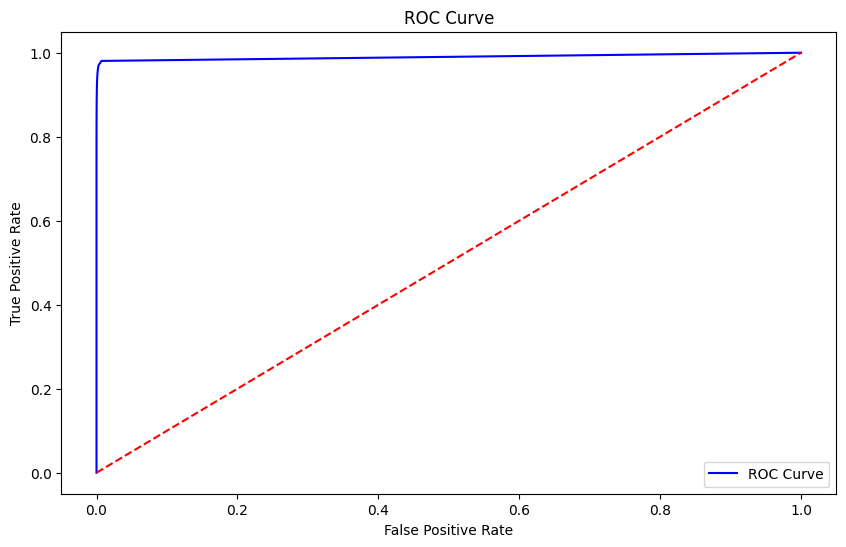

In [ ]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print("Initial Model Evaluation:")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


In [ ]:
best_rf = grid_search.best_estimator_

cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc')

print("CV Mean ROC-AUC Score:", np.mean(cv_scores))
print("CV Standard Deviation ROC-AUC Score:", np.std(cv_scores))

In [ ]:
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix_best)

class_report_best = classification_report(y_test, y_pred_best)
print("Classification Report:\n", class_report_best)

roc_auc_best = roc_auc_score(y_test, y_prob_best)
print("ROC-AUC Score:", roc_auc_best)

fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_prob_best)
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
y_pred_best = best_rf.predict(X_test)
y_prob_best = best_rf.predict_proba(X_test)[:, 1]

conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:\n", conf_matrix_best)

class_report_best = classification_report(y_test, y_pred_best)
print("Classification Report:\n", class_report_best)

roc_auc_best = roc_auc_score(y_test, y_prob_best)
print("ROC-AUC Score:", roc_auc_best)

fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_prob_best)
plt.figure(figsize=(10, 6))
plt.plot(fpr_best, tpr_best, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
